In [12]:
"""
Algorithm for converting STM32 report to a standard excel and csv dataset
"""
import pandas as pd
import re

# function for extracting all stm32 commands from the report
def get_stm32_cmds():
    with open('../../data/20230105_test.txt', 'r') as doc:
        text = doc.read()
        pattern = 'STM32 TLM received\nSTM COMMAND: \n([^\n]+)'
        matches = re.findall(pattern, text)
    return matches
stm32_cmds = get_stm32_cmds()

['57 ff 89 00 16 ff 9a 11 74 02 74 02 6f 02 71 02 74 02 71 02 b0 00 00 00 28 4f 00 c4 ce 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 34 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 58',
 '57 ff 76 00 1a ff 75 11 71 02 73 02 77 02 71 02 75 02 73 02 aa 00 00 00 2e 41 00 c4 cc 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 34 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 0

In [14]:
# function for sorting and grouping stm32 bits returning a list of grouped stm32 values in hexadecimal string formats
def stm32_concat(stm32_cmd, stm32_fields):
    start_i = 0
    stm32_row = []
    for i, row in stm32_fields.iterrows():
        nbytes = row['nbytes']
        end_i = start_i + nbytes
        
        abytes = list(stm32_cmd[start_i:end_i])
        if row['endianness'] == 'big':
            abytes.reverse()
        
        sbytes  = ''.join(abytes)
        stm32_row.append(sbytes)
        start_i = end_i
    return stm32_row
# function for creating a table of...
def cr_stm32_tbl(stm32_cmds):
    stm32_fields = pd.read_csv('../../data/stm32_fields.csv')
    stm32_table = pd.read_excel('../../data/STM32.xlsx', sheet_name='hdrs_1-3', header=[0,1])
    
    for stm32_cmd in stm32_cmds:
        stm32_cmd = stm32_cmd.split()[:29]
        stm32_row = stm32_concat(stm32_cmd, stm32_fields)
        stm32_row = list(map(lambda x: int(x, 16), stm32_row))
        stm32_table.loc[len(stm32_table.index)] = stm32_row

    return stm32_table
    
stm32_table = cr_stm32_tbl(stm32_cmds)
stm32_table

HEADER GYROSCOPE A3G4250DTR                         SUN SENSORS         \
     0x57               Gyro_X Gyro_Y Gyro_Z Gyro_Temp       SS_PX  SS_MX   
0      87                35327   5632  39679        17       29698  29698   
1      87                30463   6656  30207        17       28930  29442   
2      87                41215   3840  32511        17       28930  29698   
3      87                45311   6400  32255        17       29698  29698   
4      87                36607   7936  32511        17       28930  29698   
5      87                36607   5376  36351        16       28930  29698   
6      87                37375   2048  28927        17       29698  29698   
7      87                28415   4352  35327        17       29698  29698   
8      87                41215  10496  41983        16       29698  29698   
9      87                41727   7168  31487        16       29186  29698   
10     87                40191   2048  33023        17       29186  29954   
11     87                34559  61183  39423        17       29698  29698   
12     87                43007   7936  31999        16       29698  29698   
13     87                38911  64767  34303        18       29186  29442   
14     87                30463   1536  34815        18       29442  29442   
15     87                40447   6656  39167        17       28930  29698   
16     87                38655  62975  33023        16       30722  29954   
17     87                27135   7424  29439        16       29698  29698   
18     87                37631   4864  43007        18       29698  29698   
19     87                37887   4096  34303        16       29442  29698   
20     87                37375   9472  37119        17       29442  29698   
21     87                34815  65279  28159        17       29698  29698   
22     87                35839   7168  37631        18       29186  29698   
23     87                40447  64255  36863        17       29698  29698   
24     87                41471   2816  42751        16       28930  29442   
25     87                33791   5376  33023        17       28930  29698   
26     87                33279   6912  33535        15       28930  29698   
27     87                35839   9216  33279        16       29698  29698   
28     87                36095   5888  39423        16       29442  30210   
29     87                33279   4352  37631        17       29698  29698   
30     87                36607   7168  44799        16       29442  29698   
31     87                33791   2560  29695        16       28930  29698   
32     87                36351   5120  35839        17       28674  29442   
33     87                35327   6400  32767        17       28930  29186   
34     87                35327   2048  35327        16       29186  29442   
35     87                44031  61439  35071        16       29186  29698   
36     87                36351   9216  37119        16       28930  29698   

                               MAGNETOMETER RM3100 (External MTM)            \
    SS_PY  SS_MY  SS_PZ  SS_MZ                              Mgm_X     Mgm_Y   
0   28418  28930  29698  28930                                176   5187584   
1   30466  28930  29954  29442                                170   4271616   
2   28930  28930  29442  29186                                172   4402176   
3   28930  28930  29698  29442                                189   7486208   
4   29698  28930  29442  29442                                196   8078336   
5   30466  28674  29442  29442                                 48  13608960   
6   29186  28674  29698  29186                                 88   1560576   
7   29186  28930  29954  29698                                177   5125888   
8   29186  28930  29442  29186                                196   8078336   
9   29954  28930  29698  29442                                197   8012544   
10  29698  28674  29698  29186                     

<Axes: >

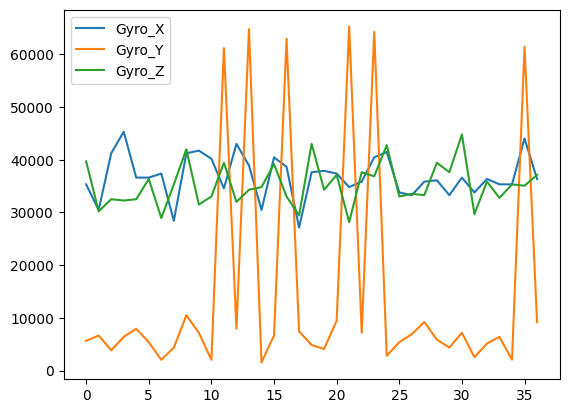

In [15]:
%matplotlib inline
stm32_table['GYROSCOPE A3G4250DTR'][['Gyro_X', 'Gyro_Y', 'Gyro_Z']].plot()

<Axes: >

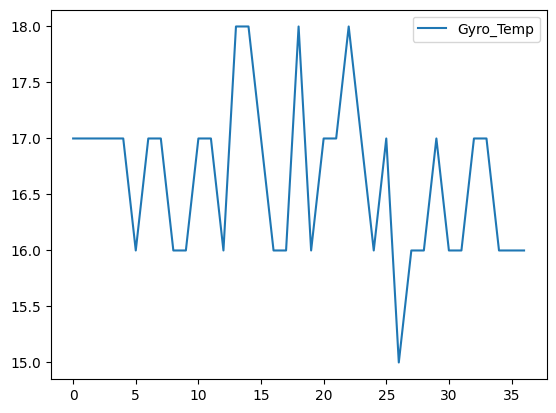

In [15]:
%matplotlib inline
stm32_table['GYROSCOPE A3G4250DTR'][['Gyro_Temp']].plot()

<Axes: >

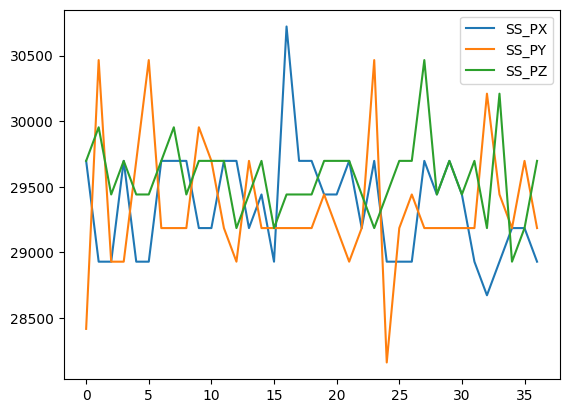

In [16]:
%matplotlib inline
stm32_table['SUN SENSORS'][['SS_PX', 'SS_PY', 'SS_PZ']].plot()

<Axes: >

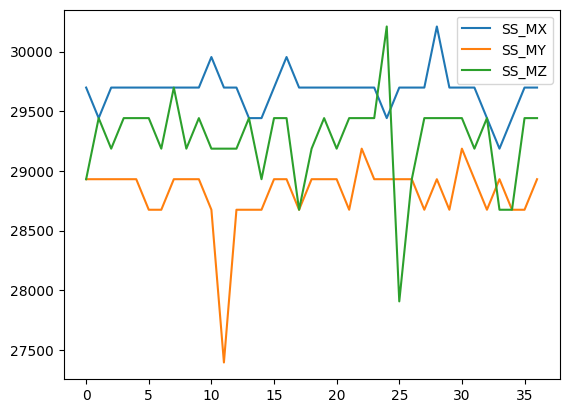

In [17]:
%matplotlib inline
stm32_table['SUN SENSORS'][['SS_MX', 'SS_MY', 'SS_MZ']].plot()

<Axes: >

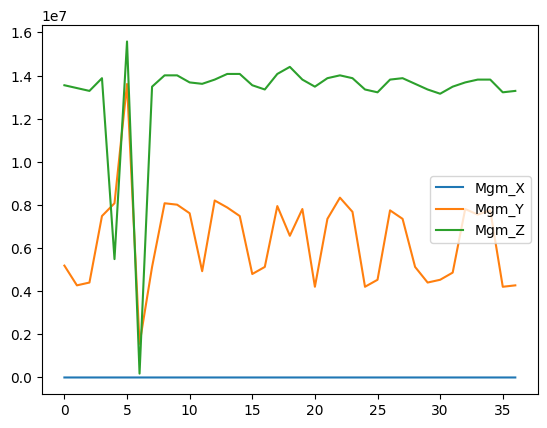

In [18]:
%matplotlib inline
stm32_table['MAGNETOMETER RM3100 (External MTM)'].plot()

<Axes: >

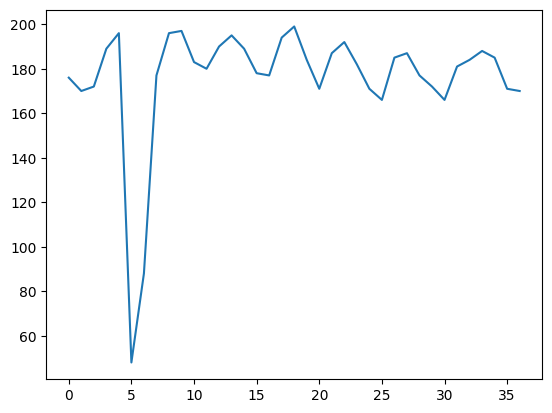

In [19]:
%matplotlib inline
stm32_table['MAGNETOMETER RM3100 (External MTM)']['Mgm_X'].plot()

""
